In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

# Preprocessing

First I load the data and fix the headers

In [23]:
columns={'2019':'Rank in 2019','2018':'Rank in 2018','2017':'Rank in 2017','Classification':'Size','Unnamed: 5':'Focus','Unnamed: 6':'Research intensity','Unnamed: 7':'Age','Unnamed: 8':'Status',
'Academic Reputation':'Academic Reputation Score','Unnamed: 10':'Academic Reputation Rank','Employer Reputation':'Employer Reputation Score',
'Unnamed: 12':'Employer Reputation Rank','Faculty Student':'Faculty Student Score','Unnamed: 14':'Faculty Student Rank','Citations per Faculty':'Citation per Faculty Score',
'Unnamed: 16':'Citation per Faculty Rank','International Faculty':'International Faculty Score','Unnamed: 18':'International Faculty Rank',
'International Students':'International Student Score','Unnamed: 20':'International Student Rank'}

In [24]:
df_2020 = pd.read_csv('2020-QS-World-University-Rankings.csv')
df_2020.rename(mapper=columns,axis=1,inplace=True)
df_2020.drop(axis=0,labels=0,inplace=True)
df_2020.reset_index(inplace=True,drop=True)

I defined a function for cleaning up unwanted characters in the values

In [26]:
def clean(string):
    try:
        string = string.replace('=','').replace('+','').strip()
        return string
    except:
        return string

I applied the function and categorized all of the rankings into 14 categories

In [27]:
c = ['Age','Academic Reputation Score','Employer Reputation Score','Faculty Student Score','Citation per Faculty Score'
,'International Faculty Score','International Student Score']
df_2020['Rank in 2020'] =df_2020['Rank in 2020'].apply(clean)
df_2020.replace('-',np.nan,inplace=True)
for i in c:
    df_2020[i]=df_2020[i].apply(clean)
    df_2020[i] = pd.to_numeric(df_2020[i])

df_2020.iloc[0:50]['Rank in 2020'] = '1-50'
df_2020.iloc[50:100]['Rank in 2020'] = '51-100'
df_2020.iloc[100:150]['Rank in 2020'] = '101-150'
df_2020.iloc[150:200]['Rank in 2020'] = '151-200'
df_2020.iloc[200:250]['Rank in 2020'] = '201-250'
df_2020.iloc[250:300]['Rank in 2020'] = '251-300'
df_2020.iloc[300:350]['Rank in 2020'] = '301-350'
df_2020.iloc[350:400]['Rank in 2020'] = '351-400'
df_2020.iloc[400:450]['Rank in 2020'] = '401-450'
df_2020.iloc[450:500]['Rank in 2020'] = '451-500'
df_2020.iloc[500:600]['Rank in 2020'] = '501-600'
df_2020.iloc[600:700]['Rank in 2020'] = '601-700'
df_2020.iloc[700:800]['Rank in 2020'] = '701-800'
df_2020.iloc[800:1000]['Rank in 2020'] = '801-1000'
df_2020 = df_2020[df_2020['Rank in 2020'].notna()]
df_2020.drop(labels=['Rank in 2019','Academic Reputation Rank','Employer Reputation Rank','Faculty Student Rank','International Faculty Rank'
,'International Student Rank','Citation per Faculty Rank'],inplace=True,axis=1)
df_2020.set_index('Institution Name',inplace=True)

<ipython-input-27-56ac97aedb38>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020.iloc[0:50]['Rank in 2020'] = '1-50'
<ipython-input-27-56ac97aedb38>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020.iloc[50:100]['Rank in 2020'] = '51-100'
<ipython-input-27-56ac97aedb38>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

I added iso_code for ploting the geographic destribution

In [35]:
iso = pd.read_csv('./iso_codes.csv')
iso.set_index(keys='country',inplace=True)
iso_alpha3=[]
for country in df_2020['Country']:
        iso_alpha3.append(iso.loc[country]['iso_alpha'])
df_2020['iso_code'] =iso_alpha3

Then i converted the overall score column's values into numerical

In [31]:
for i,row in enumerate(df_2020['Overall Score']):

   values=  str(row).split('-')
   if len(values) ==1:
    df_2020['Overall Score'][i]=float(values[0])
   else:
    df_2020['Overall Score'][i]= (float(values[0]) + float(values[1])) /2

<ipython-input-31-5b89a8c3224f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['Overall Score'][i]=float(values[0])
<ipython-input-31-5b89a8c3224f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['Overall Score'][i]= (float(values[0]) + float(values[1])) /2


Now I counted and plotted the number of nan values to get a grasp of the dataset ..first number of nan's per each rank

In [42]:
per_rank = df_2020.groupby(by='Rank in 2020')
nan_rank = []
for i in df_2020['Rank in 2020'].unique():
    percent = per_rank.get_group(name=i).isna().sum().sum() / per_rank.get_group(name=i).isna().count().sum() *100
    nan_rank.append([i,percent])
nan_rank = pd.DataFrame(nan_rank)

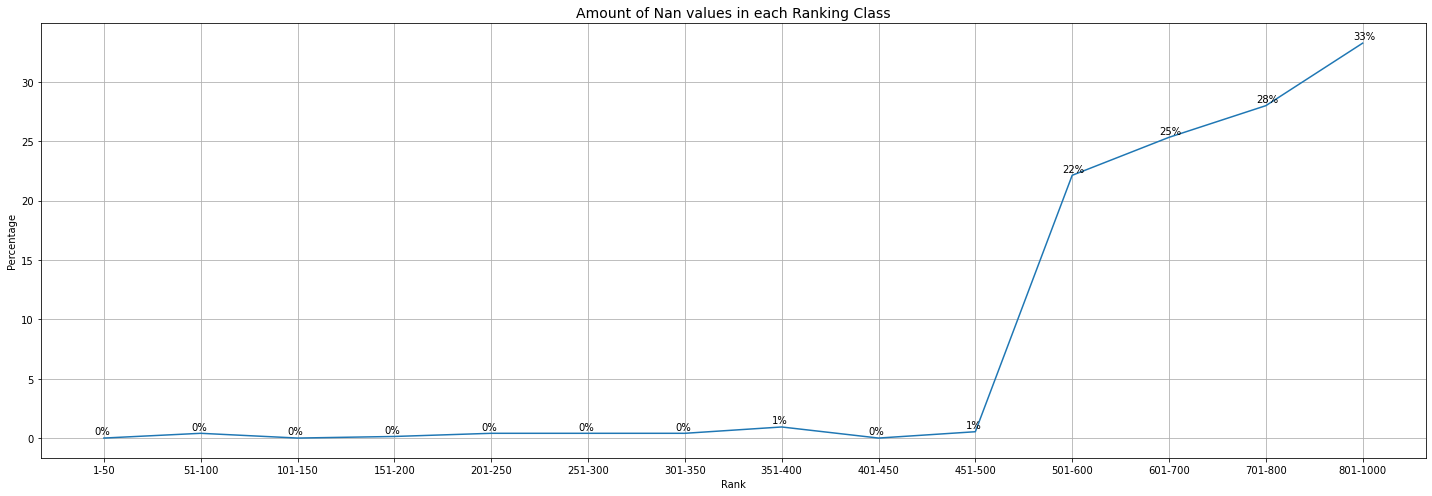

In [43]:

plt.figure(figsize=(20,7))
bars = plt.plot(nan_rank[0],nan_rank[1])
plt.title('Amount of Nan values in each Ranking Class',fontsize=14)
plt.ylabel('Percentage')
plt.xlabel('Rank')
for i, v in enumerate(nan_rank[1]):
    plt.text(i-0.1,v+0.3, str(round(v)) + '%', color='black')
plt.grid()
plt.savefig('nan_per_rank.jpg',format='jpg')


And then per column

In [40]:
null_values =df_2020.isnull().sum() / df_2020.shape[0] * 100
null_values = null_values.sort_values()

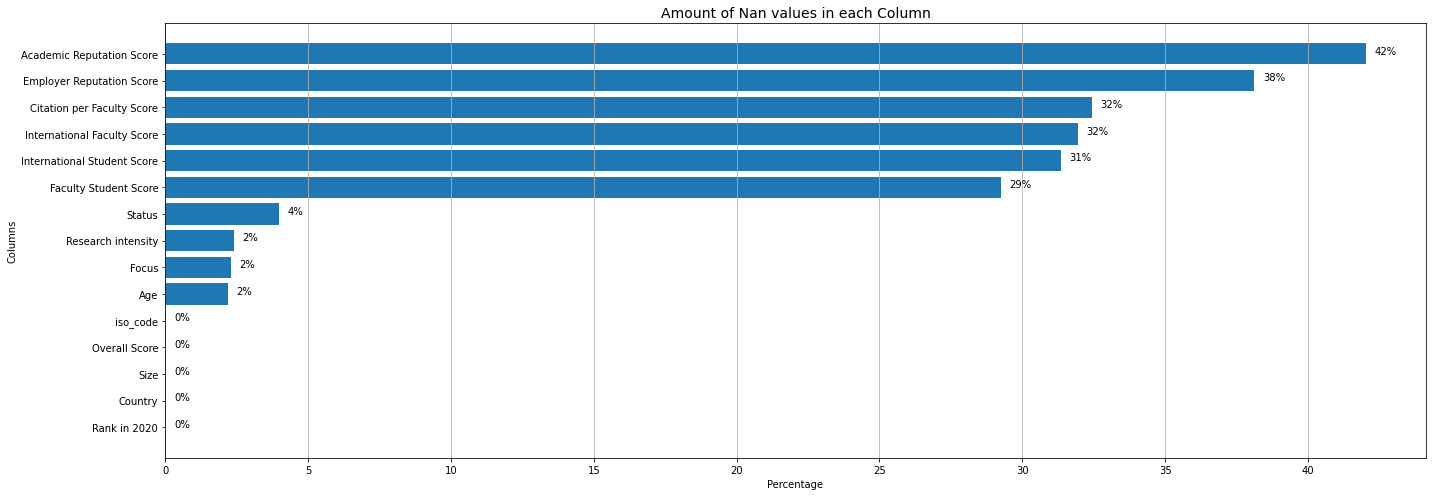

In [41]:

plt.figure(figsize=(20,7))
bars = plt.barh(null_values.index,null_values)
plt.grid(axis='x')
plt.title('Amount of Nan values in each Column',fontsize=14)
plt.ylabel('Columns')
plt.xlabel('Percentage')
for i, v in enumerate(null_values):
    plt.text(v +0.3, i, str(round(v))+'%', color='black')


# EDA

I counted the number of universities per country and plotted them on map

In [36]:
per_country = df_2020.groupby(by=['Country','iso_code'])
uni_percountry=pd.DataFrame(per_country['Rank in 2020'].count().sort_values())
uni_percountry.reset_index(inplace=True)
uni_percountry.rename({'Rank in 2020': 'Number of University'},axis=1,inplace=True,errors='raise')

In [37]:
import plotly.express as px
fig = px.choropleth(uni_percountry, locations="iso_code",
                    color="Number of University", # lifeExp is a column of gapminder
                    # hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,width=1400,height=700
                    )
fig.update_layout(
    margin=dict(l=20, r=20, t=40, b=20),
    title_font_color="black",
    legend_title_font_color="black"
)
fig.show()


this is the same statistics but with bar chart

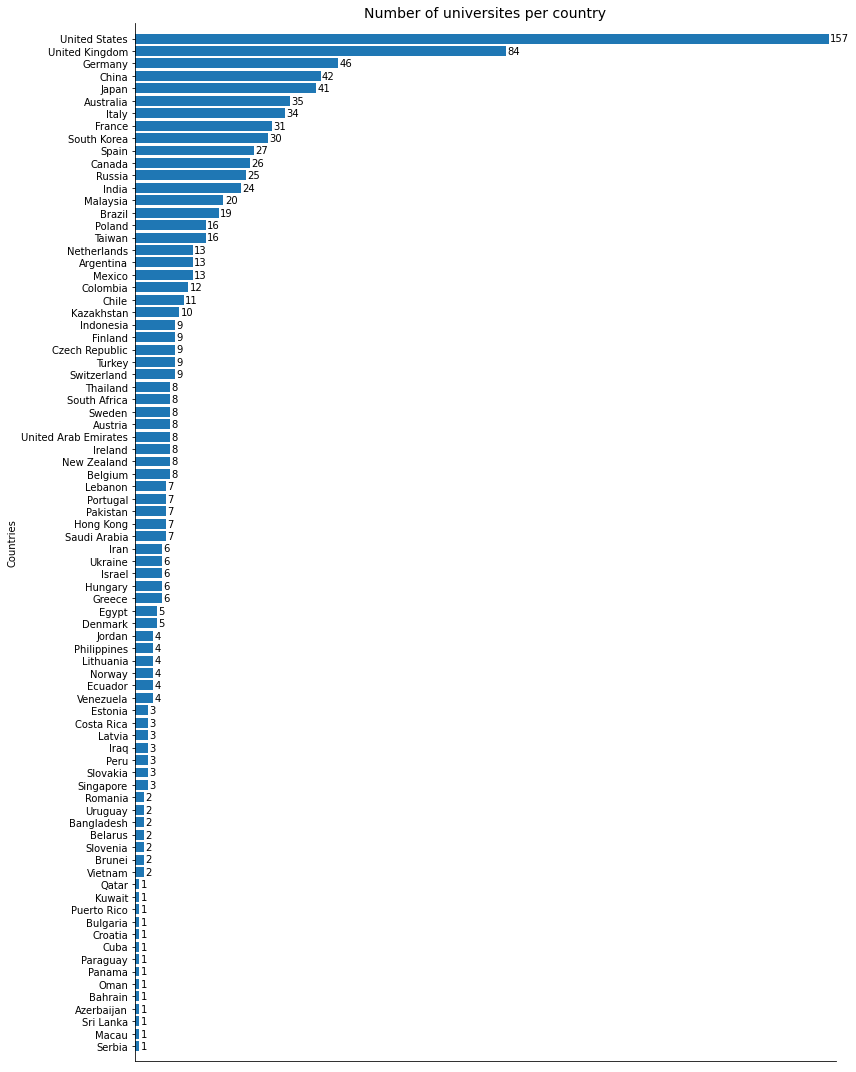

In [38]:
per_country = df_2020.groupby(by=['Country'])
uni_percountry=per_country['Rank in 2020'].count().sort_values()
plt.figure(figsize=(12,15))
bars = plt.barh(uni_percountry.index,uni_percountry)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Number of universites per country',fontsize=14)
plt.ylabel('Countries')
plt.xlabel('Universities')
for i, v in enumerate(uni_percountry):
    plt.text(v +0.3, i - 0.25, str(round(v)), color='black')
plt.margins(0.01)

Then Calculated the number of universities per each size and rank

In [44]:
size =[]
for i in df_2020['Rank in 2020'].unique():
    v= per_rank.get_group(name=i)['Size'].value_counts()
    tot=per_rank.get_group(name=i).count()[0]
    size.append([i,v['S'],v['M'],v['L'],v['XL']])
size =pd.DataFrame(np.array(size),columns=['Rank','S','M','L','XL'])
size.set_index(keys='Rank',inplace=True)
size['S'] = pd.to_numeric(size['S'])
size['M'] = pd.to_numeric(size['M'])
size['L'] = pd.to_numeric(size['L'])
size['XL'] = pd.to_numeric(size['XL'])

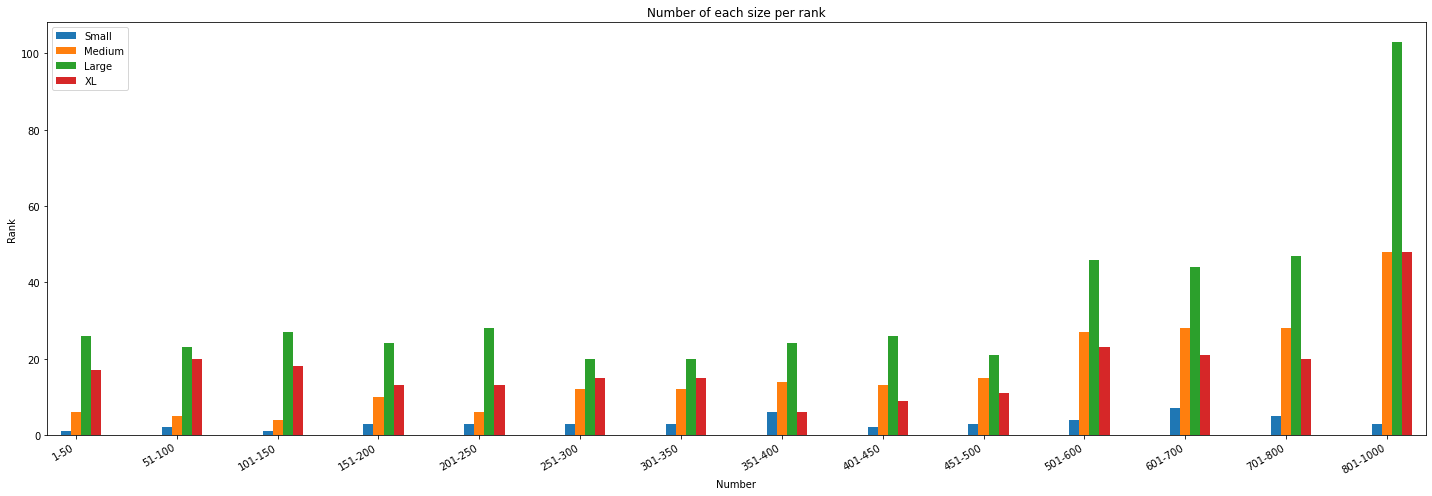

In [45]:

plt.figure(figsize=(20,7))
plt.xticks(rotation=30)
X = np.arange(len(size))
plt.bar(X - 0.1,size['S'],0.1,label='Small')
plt.bar(X ,size['M'],0.1,label='Medium')
plt.bar(X +0.1,size['L'],0.1,label='Large')
plt.bar(X + 0.2,size['XL'],0.1,label='XL')
xtick= plt.xticks(X,size.index)
# plt.yticks(np.arange(0,101,step=4),labels=np.arange(0,101,step=4))
# plt.ylim(top=102)
plt.legend()
plt.margins(x=0.01)
plt.title('Number of each size per rank')
plt.ylabel('Rank')
plt.xlabel('Number')
plt.gcf().autofmt_xdate()

Also for Research intensity

In [143]:
research_intensity =pd.DataFrame(columns=['Rank','Low','Medium','High','Very High'])
for row in df_2020['Rank in 2020'].unique():
    low= per_rank.get_group(name=row)['Research intensity'].isin(['LO']).sum()
    medium= per_rank.get_group(name=row)['Research intensity'].isin(['MD']).sum()
    high= per_rank.get_group(name=row)['Research intensity'].isin(['HI']).sum()
    veryhigh= per_rank.get_group(name=row)['Research intensity'].isin(['VH']).sum()
    research_intensity = research_intensity.append({'Rank':row,'Low':low,'Medium':medium,'High':high,'Very High':veryhigh},ignore_index=True)

research_intensity['Low'] =pd.to_numeric(research_intensity['Low'])
research_intensity['Medium'] =pd.to_numeric(research_intensity['Medium'])
research_intensity['High'] =pd.to_numeric(research_intensity['High'])
research_intensity['Very High'] =pd.to_numeric(research_intensity['Very High'])


Text(0, 0.5, 'Research intensity')

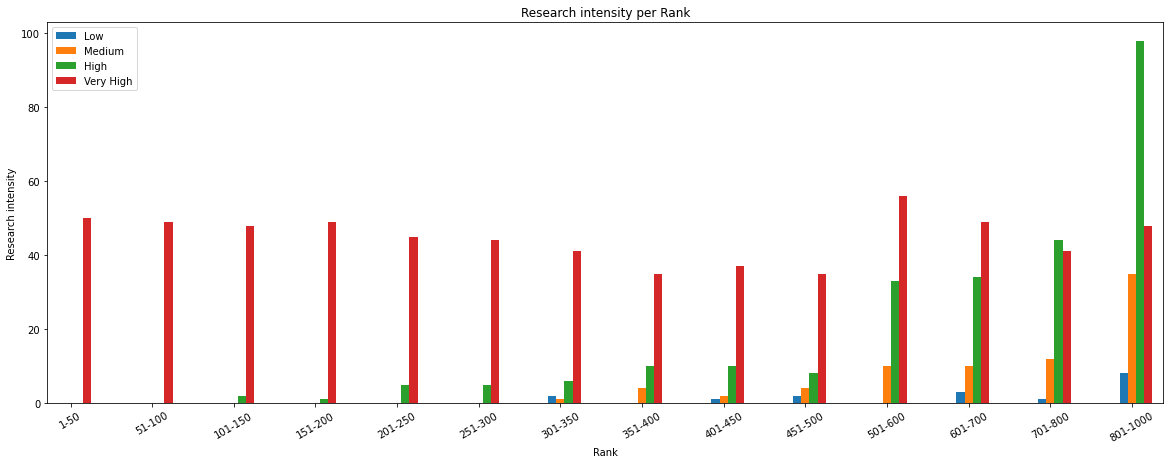

In [144]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=30)
X = np.arange(len(research_intensity))
plt.bar(X - 0.1,research_intensity['Low'],0.1,label='Low')
plt.bar(X ,research_intensity['Medium'],0.1,label='Medium')
plt.bar(X +0.1,research_intensity['High'],0.1,label='High')
plt.bar(X + 0.2,research_intensity['Very High'],0.1,label='Very High')
xtick= plt.xticks(X,size.index)
plt.legend()
plt.margins(x=0.01)
plt.title('Research intensity per Rank')
plt.xlabel('Rank')
plt.ylabel('Research intensity')

And Age

In [145]:
age=[]
for row in df_2020['Rank in 2020'].unique():
    age.append([row,per_rank.get_group(name=row)['Age'].mean()])
age = pd.DataFrame(age)

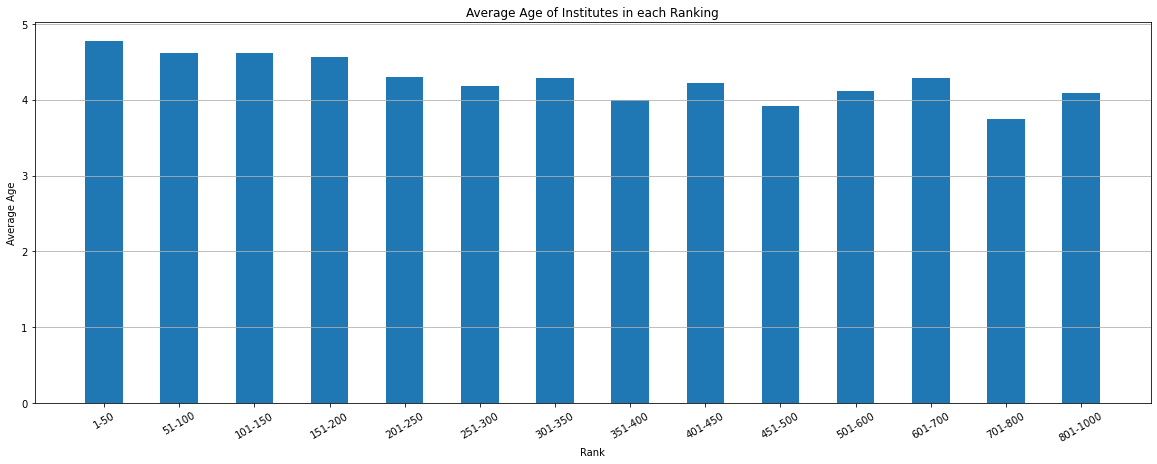

In [146]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=30)
X = np.arange(len(research_intensity))
plt.bar(age[0],age[1],0.5)
plt.title('Average Age of Institutes in each Ranking')
plt.ylabel('Average Age')
plt.xlabel('Rank')
plt.grid(axis='y')

Academic reputation

In [158]:
ac_rep=[]
for row in df_2020['Rank in 2020'].unique():
    ac_rep.append([row,round(per_rank.get_group(name=row)['Academic Reputation Score'].mean())])
ac_rep = pd.DataFrame(ac_rep)

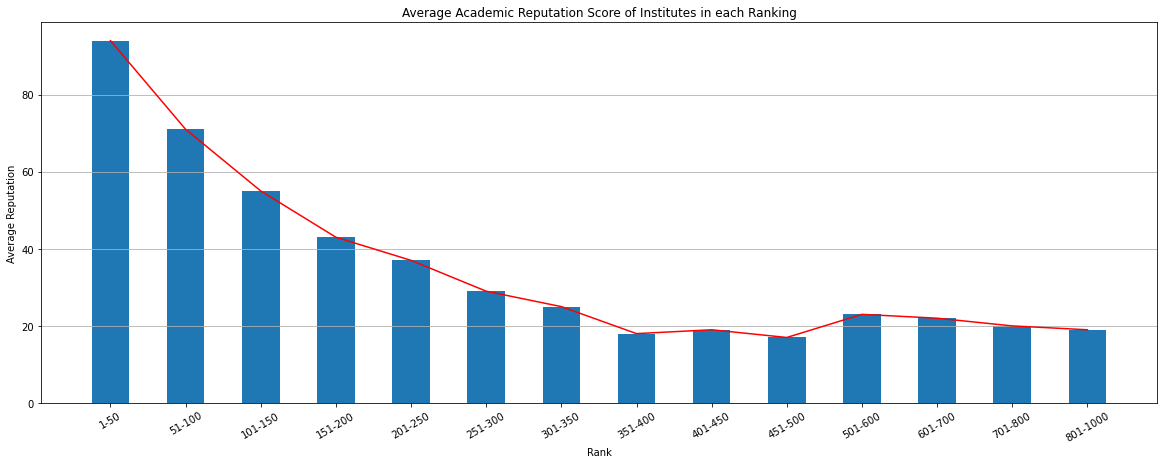

In [157]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=30)
X = np.arange(len(ac_rep))
plt.bar(ac_rep[0],ac_rep[1],0.5)
plt.plot(ac_rep[0],ac_rep[1],0.5,color='Red')
plt.title('Average Academic Reputation Score of Institutes in each Ranking')
plt.ylabel('Average Reputation')
plt.xlabel('Rank')
plt.grid(axis='y')

Employer Reputation

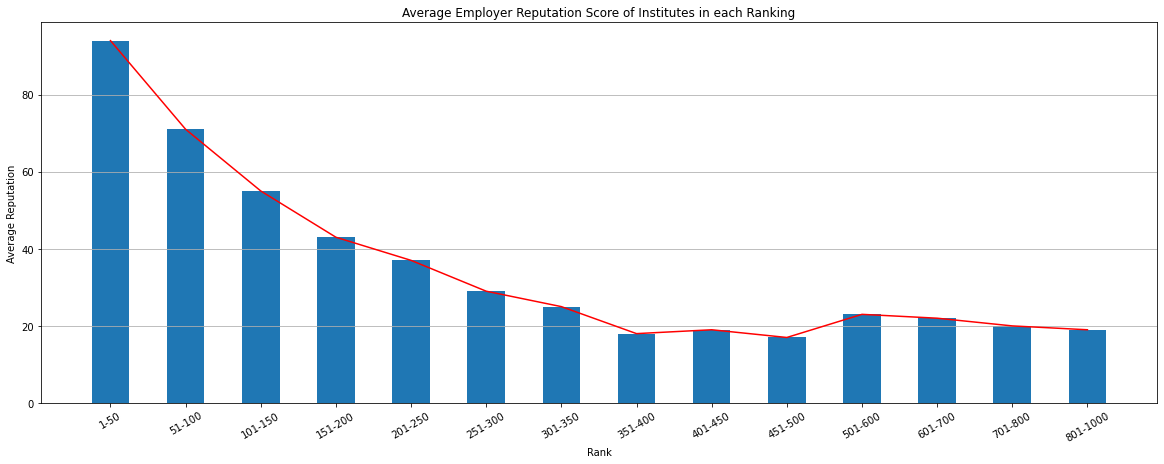

In [156]:
em_rep=[]
for row in df_2020['Rank in 2020'].unique():
    em_rep.append([row,round(per_rank.get_group(name=row)['Employer Reputation Score'].mean())])
em_rep = pd.DataFrame(em_rep)
plt.figure(figsize=(20,7))
plt.xticks(rotation=30)
X = np.arange(len(ac_rep))
plt.bar(ac_rep[0],ac_rep[1],0.5)
plt.plot(ac_rep[0],ac_rep[1],0.5,color='Red')
plt.title('Average Employer Reputation Score of Institutes in each Ranking')
plt.ylabel('Average Reputation')
plt.xlabel('Rank')
plt.grid(axis='y')

Faculty Student Score

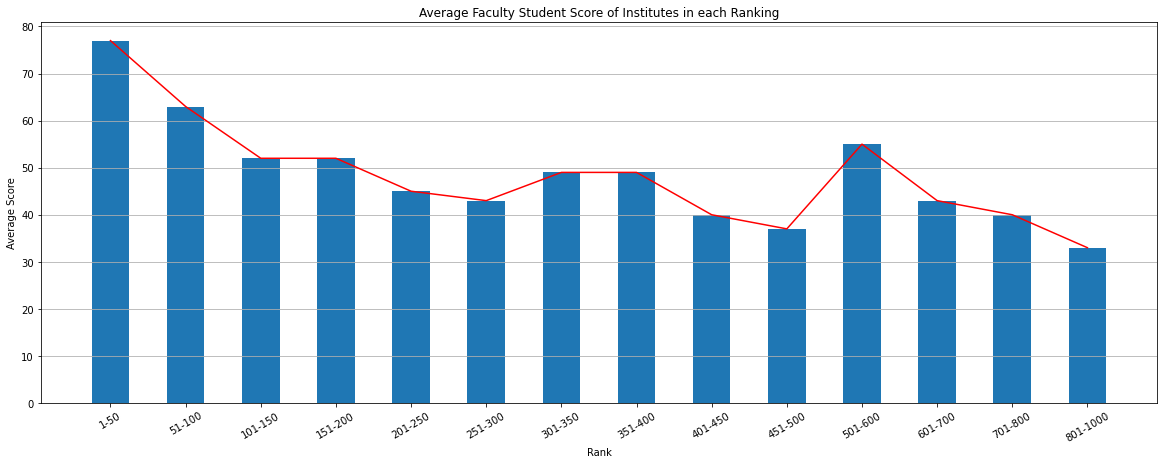

In [155]:
fac_score=[]
for row in df_2020['Rank in 2020'].unique():
    fac_score.append([row,round(per_rank.get_group(name=row)['Faculty Student Score'].mean())])
fac_score = pd.DataFrame(fac_score)
plt.figure(figsize=(20,7))
plt.xticks(rotation=30)
X = np.arange(len(fac_score))
plt.bar(fac_score[0],fac_score[1],0.5)
plt.plot(fac_score[0],fac_score[1],0.5,color='Red')
plt.title('Average Faculty Student Score of Institutes in each Ranking')
plt.ylabel('Average Score')
plt.xlabel('Rank')
plt.grid(axis='y')

Citation per faculty

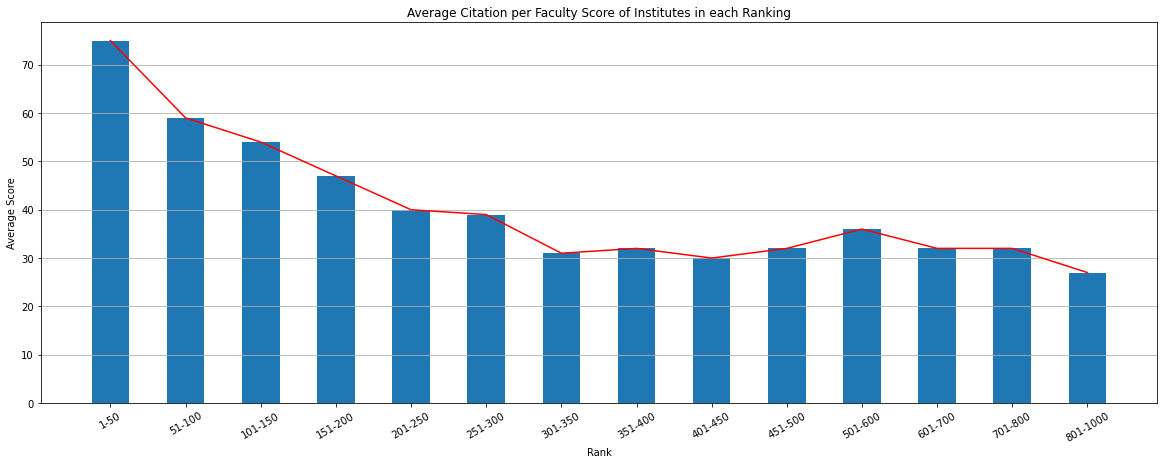

In [154]:
cit_score=[]
for row in df_2020['Rank in 2020'].unique():
    cit_score.append([row,round(per_rank.get_group(name=row)['Citation per Faculty Score'].mean())])
cit_score = pd.DataFrame(cit_score)
plt.figure(figsize=(20,7))
plt.xticks(rotation=30)
X = np.arange(len(ac_rep))
plt.bar(cit_score[0],cit_score[1],0.5)
plt.plot(cit_score[0],cit_score[1],1,color='red')
plt.title('Average Citation per Faculty Score of Institutes in each Ranking')
plt.ylabel('Average Score')
plt.xlabel('Rank')
plt.grid(axis='y')

International Faculty

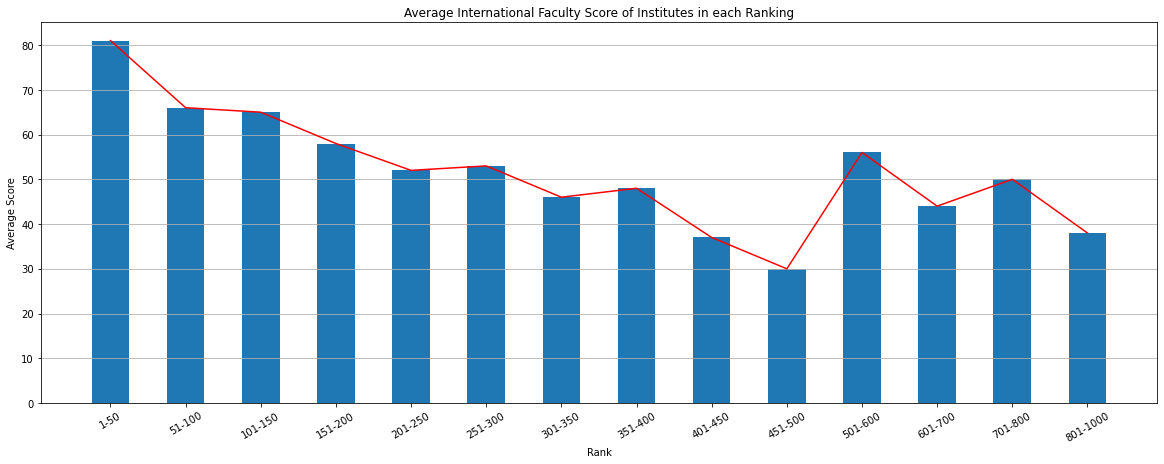

In [153]:
int_score=[]
for row in df_2020['Rank in 2020'].unique():
    int_score.append([row,round(per_rank.get_group(name=row)['International Faculty Score'].mean())])
int_score = pd.DataFrame(int_score)
plt.figure(figsize=(20,7))
plt.xticks(rotation=30)
X = np.arange(len(int_score))
plt.plot(int_score[0],int_score[1],1,color='red')
plt.bar(int_score[0],int_score[1],0.5)
plt.title('Average International Faculty Score of Institutes in each Ranking')
plt.ylabel('Average Score')
plt.xlabel('Rank')
plt.grid(axis='y')

International Student Score

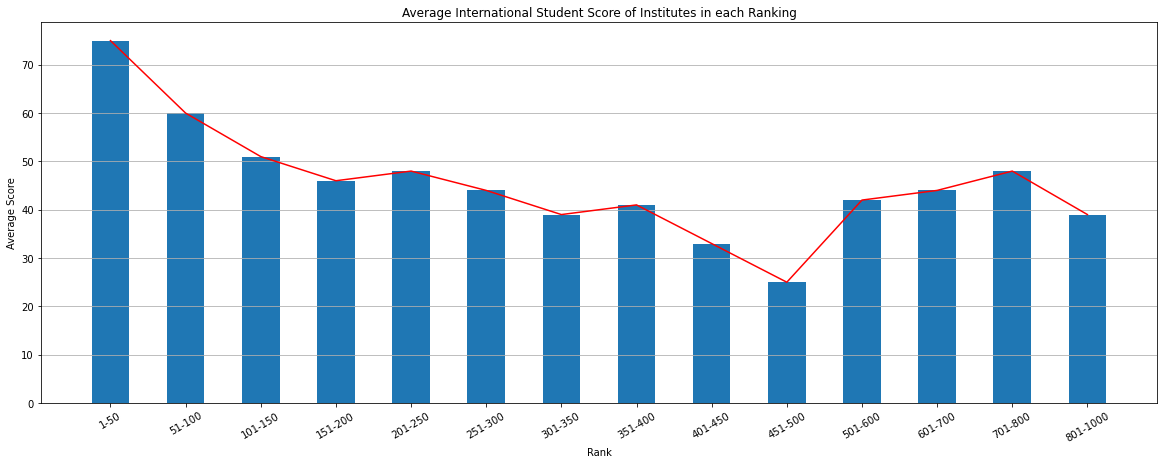

In [152]:
int_st_score=[]
for row in df_2020['Rank in 2020'].unique():
    int_st_score.append([row,round(per_rank.get_group(name=row)['International Student Score'].mean())])
int_st_score = pd.DataFrame(int_st_score)
plt.figure(figsize=(20,7))
plt.xticks(rotation=30)
X = np.arange(len(int_st_score))
plt.plot(int_st_score[0],int_st_score[1],1,color='red')
plt.bar(int_st_score[0],int_st_score[1],0.5)
plt.title('Average International Student Score of Institutes in each Ranking')
plt.ylabel('Average Score')
plt.xlabel('Rank')
plt.grid(axis='y')

In this part i added all of column values together and overall score which ranking is based on it and made a correlation matrix

In [159]:
ov_score=[]
for row in df_2020['Rank in 2020'].unique():
    ov_score.append([row,round(per_rank.get_group(name=row)['Overall Score'].mean())])
ov_score = pd.DataFrame(ov_score)
int_score.set_index(keys=0,inplace=True)
int_score.rename({1:'International faculty score'},inplace=True,axis=1)
int_st_score.set_index(keys=0,inplace=True)
int_st_score.rename({1:'International Student Score'},inplace=True,axis=1)
dt= int_st_score.join(int_score)
fac_score.set_index(0,inplace=True)
fac_score.rename({1:'Faculty student score'},inplace=1,axis=1)
dt = dt.join(fac_score)
age.set_index(0,inplace=True)
age.rename({1:'Age'},axis=1,inplace=1)
dt = dt.join(age)
cit_score.set_index(0,inplace=True)
cit_score.rename({1:'Citation Score'},axis=1,inplace=True)
em_rep.set_index(0,inplace=True)
em_rep.rename({1:'Employer reputation score'},axis=1,inplace=1)
dt = dt.join(cit_score)
dt = dt.join(em_rep)
ov_score.set_index(0,inplace=True)
ov_score.rename({1:'Overall Score'},inplace=True,axis=1)
dt = dt.join(ov_score)
corr =dt.corr()

And plotted that as heatmap

<AxesSubplot:>

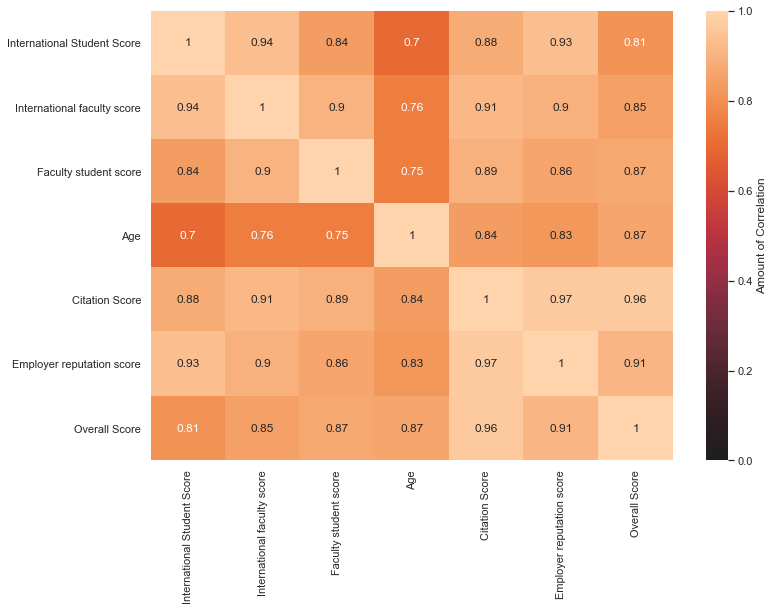

In [160]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corr,vmin=0,vmax=1,center=0,annot=True,cbar_kws={'label': 'Amount of Correlation'})

# Predictive Analysis

In [2]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
import pandas as pd
import numpy as np

In order to use classification algorithms first we have to transofrm categorical labels into numerical values</br>
I used OrdinalEncoder and LabelEncoder modules in sklearn library for that

In [3]:
df_2020= pd.read_csv('df_2020_fin.csv',index_col='Institution Name')

In [4]:
enc = OrdinalEncoder()
enc.fit(df_2020['Rank in 2020'].unique().reshape(-1,1))
df_2020['Rank in 2020'] = enc.transform(np.array(df_2020['Rank in 2020']).reshape(-1,1))

In [5]:
size_enc = OrdinalEncoder(categories=[['S','M','L','XL']])
df_2020['Size'] = size_enc.fit_transform(np.array(df_2020['Size']).reshape(-1,1))

In [6]:
focus_enc = LabelEncoder()
df_2020['Focus'] = focus_enc.fit_transform(df_2020['Focus'])

In [7]:
df_2020.fillna(value='Nan',inplace=True)

In [8]:
re_enc =OrdinalEncoder(categories=[['LO','MD','HI','VH']],handle_unknown='use_encoded_value',unknown_value=np.nan)
re_enc.fit(np.array(['LO','MD','HI','VH']).reshape(-1,1))
df_2020['Research intensity'] = re_enc.transform(np.array(df_2020['Research intensity']).reshape(-1,1))

Country and iso_code and status columns are unnecessary and we can't classify with them, so I drop them

In [9]:
df = df_2020.drop(labels=['Country','iso_code','Status'],axis=1)

Use Implementing KNN

In [10]:
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5,copy=True)
# imputer.fit(df)
# df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)
# df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

OR Droping Nan values

In [127]:
df_2020 = df_2020.dropna()

Now I separate Labels (ranks) from dataset

In [11]:
y = df['Rank in 2020']

In [12]:
df.drop(['Rank in 2020','Overall Score'],axis=1,inplace=True)

And separate Dataset into test and train

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict,cross_val_score

In [132]:
X_train , X_test , y_train, y_test = train_test_split(df,y,test_size=0.2,random_state=0)

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [134]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [135]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

6

In [136]:
print(selected_feat)

Index(['Academic Reputation Score', 'Employer Reputation Score',
       'Faculty Student Score', 'Citation per Faculty Score',
       'International Faculty Score', 'International Student Score'],
      dtype='object')


In [14]:
df.drop(['Research intensity','Age','Size','Focus'],axis=1,inplace=True)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [21]:
clf = LogisticRegression(max_iter= 10000).fit(X_train,y_train)
y_pred = clf.predict(X_test)
clf.score(X_test,y_test)
print(classification_report(y_test,y_pred))

NameError: name 'X_train' is not defined

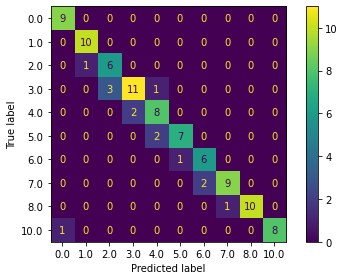

In [139]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()


In [140]:
clf = KNeighborsClassifier().fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86         9
         1.0       0.55      0.60      0.57        10
         2.0       0.14      0.29      0.19         7
         3.0       0.62      0.33      0.43        15
         4.0       0.25      0.20      0.22        10
         5.0       0.38      0.33      0.35         9
         6.0       0.18      0.29      0.22         7
         7.0       0.27      0.36      0.31        11
         8.0       0.00      0.00      0.00        11
        10.0       0.80      0.44      0.57         9

    accuracy                           0.38        98
   macro avg       0.39      0.38      0.37        98
weighted avg       0.41      0.38      0.38        98



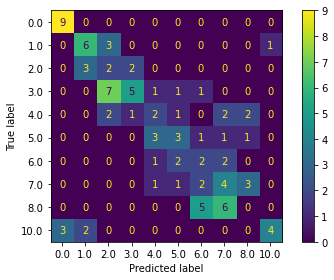

In [141]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [142]:
from sklearn import svm

In [143]:
clf = svm.LinearSVC(max_iter=100000)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred,zero_division=0))

              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90         9
         1.0       0.00      0.00      0.00        10
         2.0       0.20      0.14      0.17         7
         3.0       0.50      0.07      0.12        15
         4.0       0.33      0.30      0.32        10
         5.0       0.00      0.00      0.00         9
         6.0       0.50      0.57      0.53         7
         7.0       1.00      0.18      0.31        11
         8.0       0.56      0.91      0.69        11
        10.0       0.17      0.78      0.27         9

    accuracy                           0.38        98
   macro avg       0.41      0.39      0.33        98
weighted avg       0.43      0.38      0.32        98



C:\Users\Siavash\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



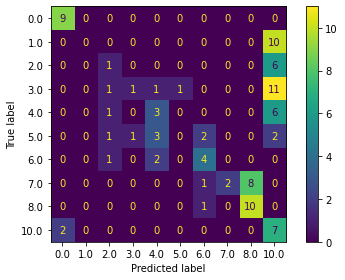

In [144]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [145]:
clf.score(X_test,y_test)

0.37755102040816324

In [146]:
from sklearn import tree

In [147]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90         9
         1.0       0.38      0.30      0.33        10
         2.0       0.29      0.29      0.29         7
         3.0       0.44      0.27      0.33        15
         4.0       0.31      0.40      0.35        10
         5.0       0.12      0.11      0.12         9
         6.0       0.25      0.29      0.27         7
         7.0       0.15      0.18      0.17        11
         8.0       0.30      0.27      0.29        11
        10.0       0.55      0.67      0.60         9

    accuracy                           0.37        98
   macro avg       0.36      0.38      0.36        98
weighted avg       0.36      0.37      0.36        98



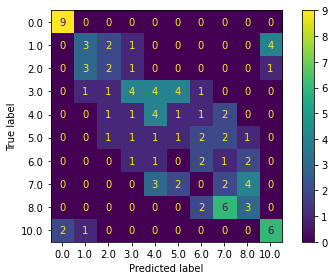

In [148]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()


In [341]:
clf.score(X_test,y_test)

0.41836734693877553

In [149]:
from sklearn.neural_network import MLPClassifier

In [152]:
clf = MLPClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.64      1.00      0.78         9
         1.0       0.27      0.30      0.29        10
         2.0       0.09      0.14      0.11         7
         3.0       0.38      0.20      0.26        15
         4.0       0.20      0.20      0.20        10
         5.0       0.00      0.00      0.00         9
         6.0       0.25      0.43      0.32         7
         7.0       0.00      0.00      0.00        11
         8.0       0.12      0.09      0.11        11
        10.0       0.50      0.56      0.53         9

    accuracy                           0.28        98
   macro avg       0.25      0.29      0.26        98
weighted avg       0.25      0.28      0.25        98



C:\Users\Siavash\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



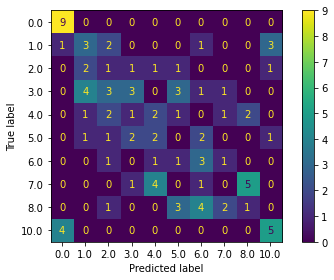

In [153]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()


In [343]:
clf.score(X_test,y_test)

0.2755102040816326

In [154]:
acc = {'Logistic Regression':0.58,'KNN':0.53,'Linear SVM':0.34,'Decision Tree':0.48,'MLP Classifier':0.35}
drop_nan = {'Logistic regression':0.94,'KNN':0.37,'Linear SVM':0.45,'Decision Tree':0.39,'MLP Classifier':0.28}

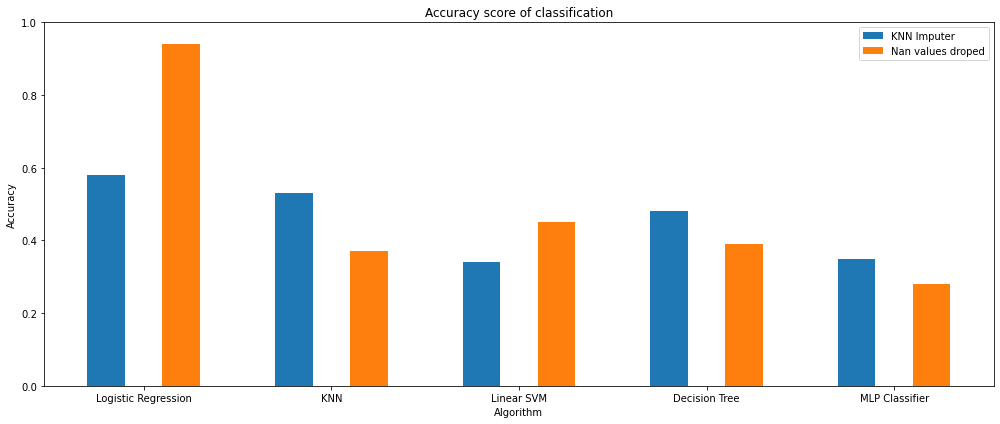

In [75]:
x = np.array(range(len(acc.keys())))
plt.figure(figsize=(14,6))
plt.xticks(ticks=x,labels=acc.keys())
plt.bar(x-0.2,acc.values(),width=0.2,label='KNN Imputer')
plt.bar(x+0.2,drop_nan.values(),width=0.2,label='Nan values droped')
plt.ylim(top=1,bottom=0)
plt.title('Accuracy score of classification')
plt.ylabel('Accuracy')
plt.xlabel('Algorithm')
plt.legend()